In [1]:
#| echo: false

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

np.random.seed(1234)

## Scatter plot

Scatter plot is a graph in which the values of two variables are plotted along two axes. It is a most basic type of plot that helps you visualize the relationship between two variables.

The closer the data points come to forming a straight line when plotted, the higher the correlation between the two variables, or the stronger the relationship.

If a relationship exists, the scatterplot indicates its direction and whether it is a linear or curved relationship. In @fig-satu, relationships between variables can be described in many ways: **positive** or **negative**, **strong** or **weak**.

A scatter plot can also be useful for identifying other patterns in data. We can divide data points into groups based on how closely sets of points cluster together. Scatter plots can also show if there are any unexpected gaps in the data and if there are any outlier points. This can be useful if we want to segment the data into different parts

![Scatter Plot Relationship](asset/corre.png "scatter correlation"){#fig-satu}

## Correlation

| r     | Strength of Relationship |
| ----------- | ----------- |
| r < 0.3      | None or very weak |
| 0.3 < r <0.5   | Weak |
| 0.5 < r < 0.7 | Moderate |
| r > 0.7 | Strong |

: Correlation insights {#tbl-letters .striped .hover}

The correlation (r) measures the strength of the linear relationship between two quantitative variables. In @tbl-letters, we can know how the variables are correlated with a specific value.

In [2]:
#| echo: false
# Reading data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

## Titanic Dataset

Now, let's see data correlation with Titanic Disaster Data from Kaggle. Let's try to do scatter plot based on Table 2. Common way of visualize multiple scatter plot at once is to use pair-plot.

In [3]:
#| label: table-titanic
#| tbl-cap: "Titanic Data (first five row)"
#| echo: false
# preview the data

from IPython.display import display, HTML
def print_df(df, head=5):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(df.head(head))

train_df = train_df.reset_index(drop=True)
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
print_df(train_df)

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

In [4]:
#| echo: false

#the median will be an acceptable value to place in the NaN cells
train_df["Age"].fillna(train_df["Age"].median(), inplace = True)
train_df["Embarked"].fillna("S", inplace = True)

# change to numbering
train_df.loc[train_df["Sex"] == "male", "Sex"] = 0
train_df.loc[train_df["Sex"] == "female", "Sex"] = 1

train_df.loc[train_df["Embarked"] == "S", "Embarked"] = 0
train_df.loc[train_df["Embarked"] == "C", "Embarked"] = 1
train_df.loc[train_df["Embarked"] == "Q", "Embarked"] = 2

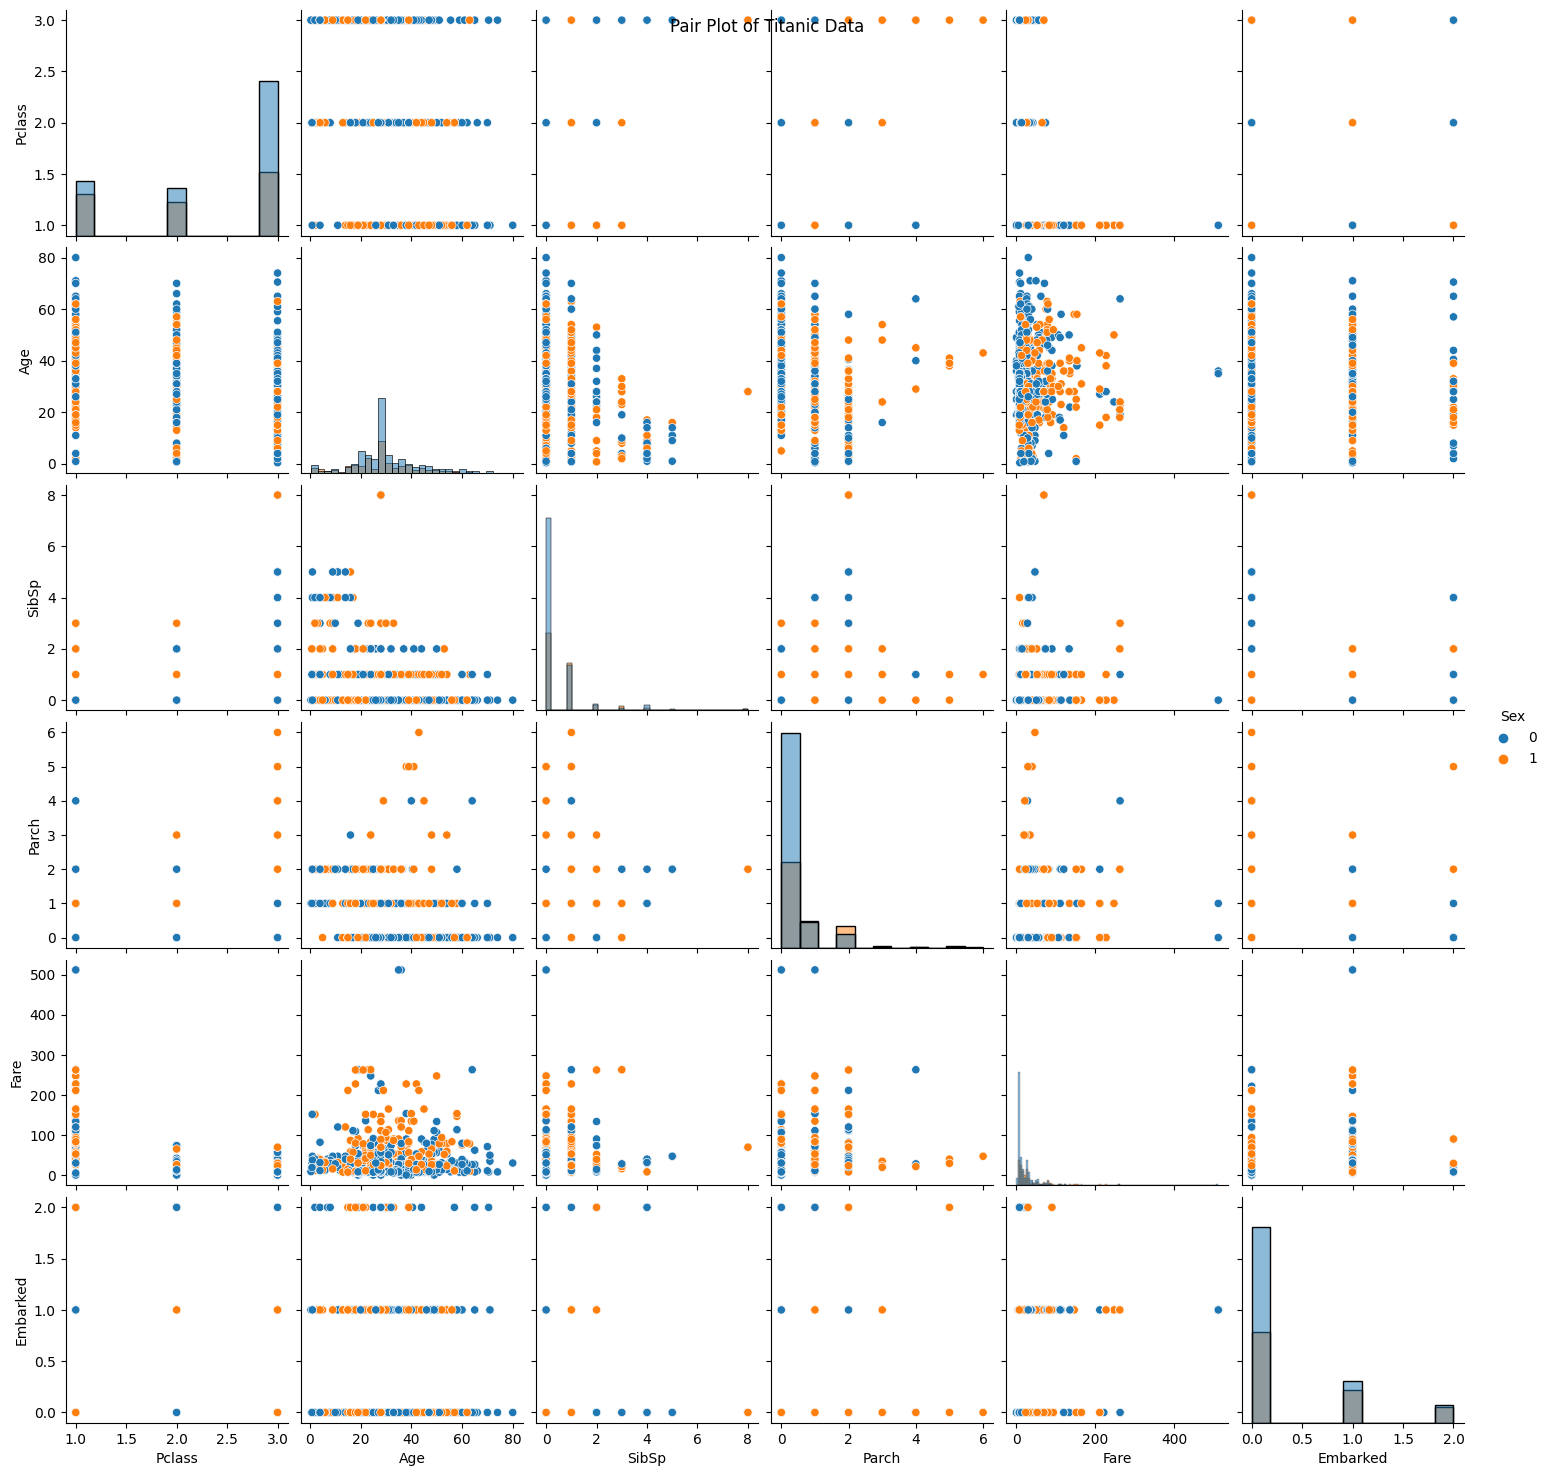

In [5]:
#| label: pairplot
#| fig-cap: "Pair-plot for titanic dataset"
#| echo: false

import seaborn as sns
g = sns.pairplot(train_df, hue="Sex", diag_kind="hist", corner=False);
g.fig.suptitle("Pair Plot of Titanic Data");

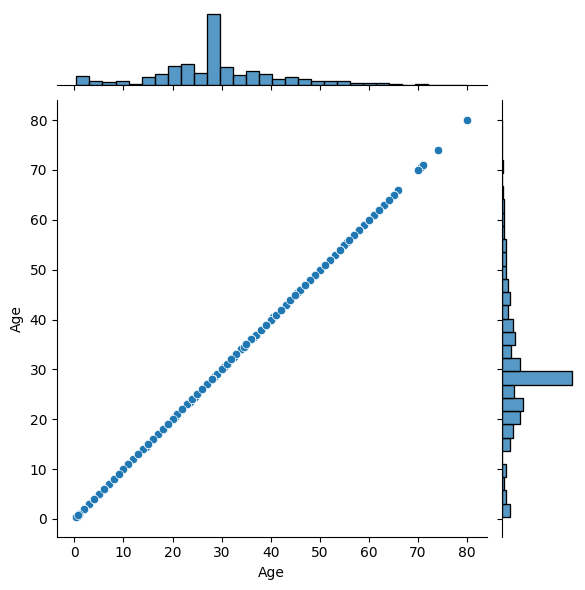

In [6]:
#| label: scatter-plot-1D
#| fig-cap: "single scatter plot"
#| echo: false

# marginal histogram
sns.jointplot(data = train_df,
              x = "Age",
              y = "Age");

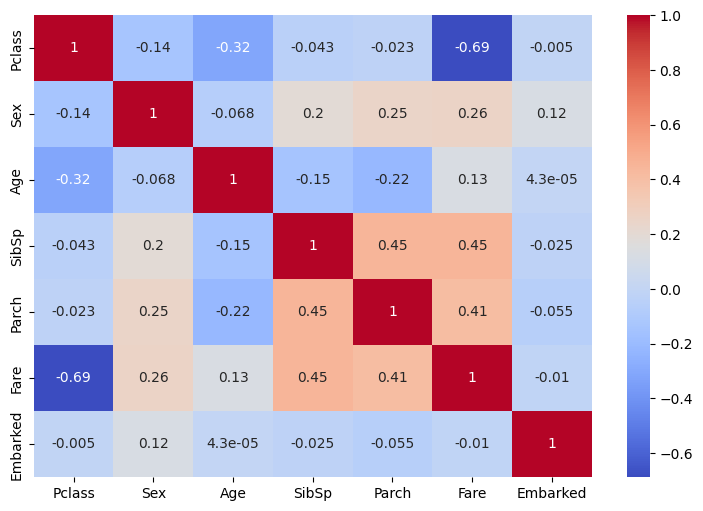

In [7]:
#| label: correlation plot
#| fig-cap: "correlation plot for titanic data"
#| echo: false

corr = train_df.corr(method='spearman')

f,ax = plt.subplots(figsize=(9,6))
# sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
sns.heatmap(corr, annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)
# plt.subplot(1, 2, 1)
plt.show()

We can observed from Figure 2 :

- diagonal plot is histogram $\Longrightarrow$ represent single variable, **_histogram_** or **_density curve plot_** can be use. This diagonal plot, allow us to observed the **_single variable_** data distribution. Figure 2 is example using scatter-plot
- off-diagonal is scatter-plot between 2 variables $\Longrightarrow$ normal scatter-plots and we can check _correlation_ value via Figure 4

> Thus, when two features have high correlation, we can drop one of the two features.